# Scheduling mechanism

In this notebook, we evaluate the efficacy of Gavel's scheduling mechanism. We compare against an ideal mechanism that allocates each job time proportional to the computed optimal allocation. We also evaluate the effect of round duration on end objectives.

## Import statements

In [1]:
from plotting_utils import plot_metric_vs_inverse_lambda_different_mechanisms
from utils import get_logfile_paths, average_jct_fn

## Get list of relevant logfiles and define label mapping

In [2]:
mechanism_logfile_paths = sorted(get_logfile_paths(
    "/future/u/deepakn/gavel/logs/single_gpu_continuous_jobs_final/"))
ideal_logfile_paths = sorted(get_logfile_paths(
    "/future/u/deepakn/gavel/logs/single_gpu_continuous_jobs_ideal_final/"))
mechanism_720_logfile_paths = sorted(get_logfile_paths(
    "/future/u/deepakn/gavel/logs/single_gpu_continuous_jobs_round=720_final/"))
mechanism_1440_logfile_paths = sorted(get_logfile_paths(
    "/future/u/deepakn/gavel/logs/single_gpu_continuous_jobs_round=1440_final/"))
mechanism_2880_logfile_paths = sorted(get_logfile_paths(
    "/future/u/deepakn/gavel/logs/single_gpu_continuous_jobs_round=2880_final/"))

In [3]:
labels = {"max_min_fairness_perf": "Gavel",
          "max_min_fairness_packed": "Gavel w/ SS"}

## Plot average JCT versus input job rate for Gavel mechanism and ideal

['max_min_fairness_perf']


/lfs/1/deepak/gpusched/scheduler/notebooks/figures/evaluation/plotting_utils.py:146: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)


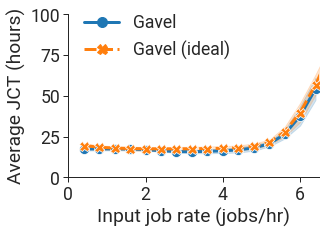

In [4]:
all_logfile_paths = [mechanism_logfile_paths, ideal_logfile_paths]
label_modifiers = ["", " (ideal)"]
plot_metric_vs_inverse_lambda_different_mechanisms(
    all_logfile_paths,
    labels,
    label_modifiers,
    v100s=36, p100s=36, k80s=36,
    policies=["max_min_fairness_perf"],
    metric_fn=lambda x: average_jct_fn(x, min_job_id=4000, max_job_id=5000),
    metric_label="Average JCT (hours)",
    xmax=6.5,
    ymax=100.0,
    extrapolate=False,
    output_filename="continuous_jobs/single_gpu_las_ideal_v100=36_p100=36_k80=36.pdf"
)

## Plot average JCT versus input job rate for different round durations

['max_min_fairness_perf']


/lfs/1/deepak/gpusched/scheduler/notebooks/figures/evaluation/plotting_utils.py:146: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)


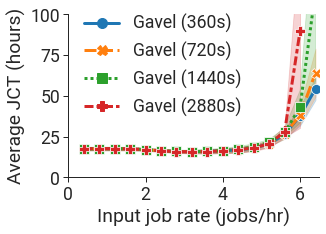

['max_min_fairness_packed']


/lfs/1/deepak/gpusched/scheduler/notebooks/figures/evaluation/plotting_utils.py:146: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)


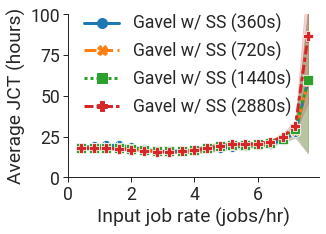

In [5]:
all_logfile_paths = [mechanism_logfile_paths, mechanism_720_logfile_paths, mechanism_1440_logfile_paths,
                     mechanism_2880_logfile_paths]
label_modifiers = [" (360s)", " (720s)", " (1440s)", " (2880s)"]
plot_metric_vs_inverse_lambda_different_mechanisms(
    all_logfile_paths,
    labels,
    label_modifiers,
    v100s=36, p100s=36, k80s=36,
    policies=["max_min_fairness_perf"],
    metric_fn=lambda x: average_jct_fn(x, min_job_id=4000, max_job_id=5000),
    metric_label="Average JCT (hours)",
    xmax=6.5,
    ymax=100.0,
    extrapolate=False,
    output_filename="continuous_jobs/single_gpu_las_perf_round_sweep_v100=36_p100=36_k80=36.pdf"
)
plot_metric_vs_inverse_lambda_different_mechanisms(
    all_logfile_paths,
    labels,
    label_modifiers,
    v100s=36, p100s=36, k80s=36,
    policies=["max_min_fairness_packed"],
    metric_fn=lambda x: average_jct_fn(x, min_job_id=4000, max_job_id=5000),
    metric_label="Average JCT (hours)",
    ymax=100.0,
    extrapolate=False,
    output_filename="continuous_jobs/single_gpu_las_packed_round_sweep_v100=36_p100=36_k80=36.pdf"
)